# Handling Missing Numerical Value

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


Handling  with Mean/Median

In [4]:
df= pd.read_csv('dataset\data_science_job.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [7]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
cols =[var for var in df.columns if df[var].isnull().mean()<.05 and df[var].isnull().mean()>0 ]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
toy =pd.read_csv('dataset\\titanic_toy.csv')
toy.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [10]:
toy.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [11]:
X =toy.drop(columns=['Survived'])
Y= toy['Survived']

In [12]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=2)

In [13]:
X_train.shape ,X_test.shape

((712, 3), (179, 3))

In [14]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [33]:
mean_age = X_train['Age'].mean()
median_age =X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare =X_train['Fare'].median()

In [37]:
X_train['Age_mean'] =X_train['Age'].fillna(mean_age)
X_train['Age_median'] =X_train['Age'].fillna(median_age)


X_train['Fare_mean'] =X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] =X_train['Fare'].fillna(median_fare)

In [38]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_medain,Fare_median
421,21.0,7.7333,0,21.000000,21.00,7.7333,7.7333,7.7333
559,36.0,17.4000,1,36.000000,36.00,17.4000,17.4000,17.4000
804,27.0,6.9750,0,27.000000,27.00,6.9750,6.9750,6.9750
790,NaN,7.7500,0,29.785904,28.75,7.7500,7.7500,7.7500
302,19.0,0.0000,0,19.000000,19.00,0.0000,0.0000,0.0000


In [39]:
print('Orginal Age Variable variance:',X_train['Age'].var())
print('Age Variance after mean:',X_train['Age_mean'].var())
print('Age Variance after median:',X_train['Age_median'].var())
print("---------------------------------")
print('Orginal Fare Variable variance:',X_train['Fare'].var())
print('Fare Variance after mean:',X_train['Fare_mean'].var())
print('Fare Variance after median:',X_train['Fare_median'].var())


Orginal Age Variable variance: 204.34951339046142
Age Variance after mean: 161.81262452718676
Age Variance after median: 161.98956633460548
---------------------------------
Orginal Fare Variable variance: 2448.1979137063163
Fare Variance after mean: 2324.2385256705534
Fare Variance after median: 2340.09102197536


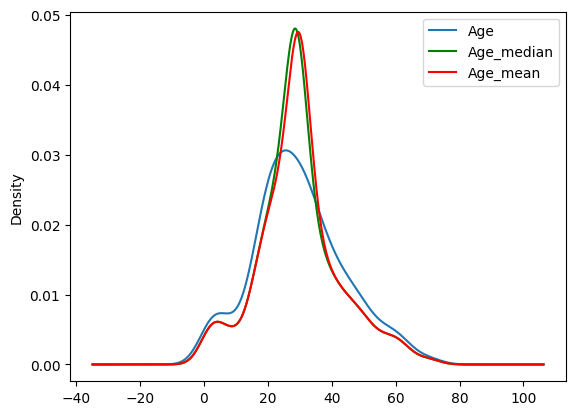

In [40]:
fig =plt.figure()
ax =fig.add_subplot(111)

# Orginal variable distribution
X_train['Age'].plot(kind ='kde',ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind ='kde',ax=ax,color='green')

# Varible imputed with the mean
X_train['Age_mean'].plot(kind ='kde',ax=ax,color ='red')

# add legend
lines,labels =ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


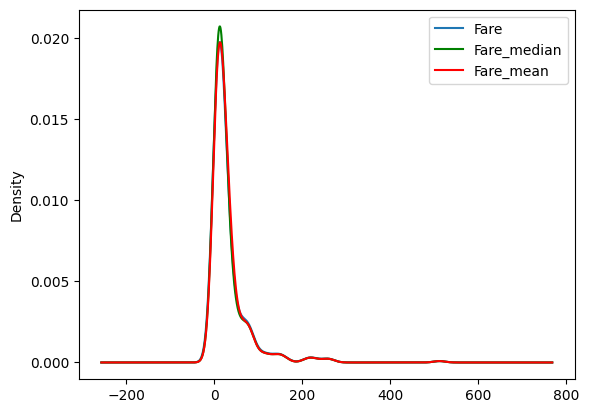

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# Variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='green')

# Variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='red')

# Add legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


In [42]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_medain,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526,2324.238526
Fare_medain,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022,2340.091022
Fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022,2340.091022


<Axes: >

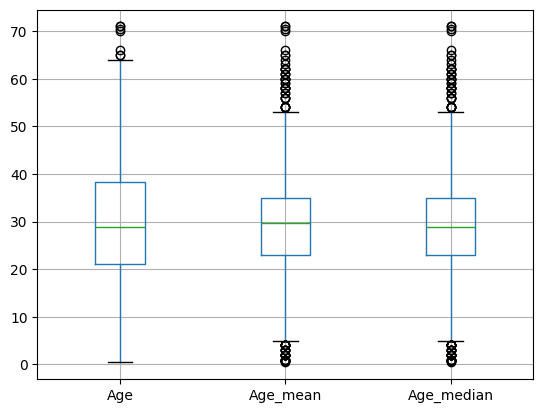

In [43]:
# box plot for checking outliers
X_train[['Age','Age_mean','Age_median']].boxplot()

<Axes: >

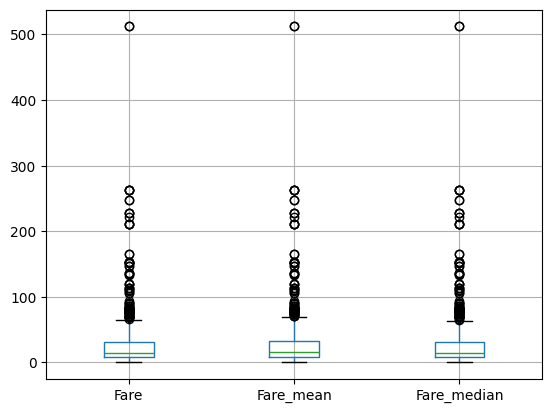

In [44]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

# Using Sklearn

In [45]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=2)

In [46]:
imputer1 =SimpleImputer(strategy='mean')
imputer2 =SimpleImputer(strategy='median')

In [47]:
trf =ColumnTransformer(transformers=[('imputer1',imputer1,['Age']),
                                     ('imputer2',imputer2,['Fare'])],remainder='passthrough')

In [48]:
trf.fit(X_train)


C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [49]:
trf.named_transformers_['imputer1'].statistics_

array([29.78590426])

In [50]:
trf.named_transformers_['imputer2'].statistics_

array([14.4583])

In [52]:
X_train =trf.transform(X_train)
X_test =trf.transform(X_test)

In [53]:
X_train

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]])

 For Arbitary Column

In [57]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=2)

In [58]:
imputer99 =SimpleImputer(strategy='constant',fill_value=99)
imputer999 =SimpleImputer(strategy='constant',fill_value=999) 

In [59]:
trf9 =ColumnTransformer([('imputer99',imputer99,['Age']),('imputer999',imputer999,['Fare'])],remainder='passthrough')

In [60]:
trf9.fit(X_train)

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer99',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer999',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [64]:
trf9.named_transformers_['imputer99'].statistics_


array([99.])

In [65]:
trf9.named_transformers_['imputer999'].statistics_

array([999.])

# End of Distribution

same as arbitray 
